In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 크롤링
import requests
from urllib import request
from bs4 import BeautifulSoup

# 텍스트 분석
import json
import re
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
from functools import reduce

# 한글
import matplotlib
import matplotlib.font_manager as fm
font_loc = 'C:/Windows/Fonts/H2PORM.TTF'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 뉴스기사 제목 크롤링
# 2022년 9월 한달간 경제 관련 기사의 제목 텍스트 분석
title_list = []
for i in range(1, 20):
    for j in range(1, 30):
        url = f'https://news.daum.net/breakingnews/economic?page={i}&regDate=202209{j}'
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        
        news_data = soup.select('div > ul > li > div > strong > a')
        title_list += [news.text.strip() for news in news_data]

remove_list = ['포토', '만에']

title = set(title_list) # 중복되는 기사 제목이 많아서 set 변환으로 중복 제거
title = list(title) # 다시 리스트 형태로 변환
# title

In [3]:
# 텍스트 분석 시각화
def TextAnalysis(data_list:list, remove_words:list, cnt=0):
    temp = [re.sub(r'[^\w]', ' ', word) for word in data_list]
    temp = [i.split() for i in temp]
    temp = reduce(lambda x, y: x+y, temp)
    temp = [re.sub(r'[^\w]', ' ', word) for word in temp]
    temp = [word for word in temp if len(word) > 1]

    temp = [word for word in temp if not np.any([word[-2:] in remove_words, word[-1] in remove_words])]
    temp_cnt = Counter(temp)

    if cnt != 0:     
        temp_cnt = dict(temp_cnt.most_common(cnt))

    wc = WordCloud(font_loc, background_color='white', width=800, height=600)
    img = wc.generate_from_frequencies(temp_cnt)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

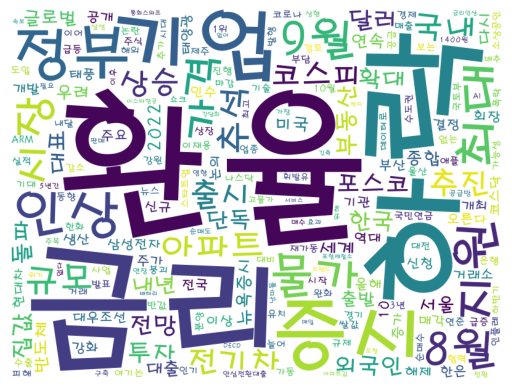

In [4]:
TextAnalysis(title, remove_list)

In [5]:
# 비교 자료 → 1년전(2021년 9월) 경제 뉴스 텍스트 분석
# 2022년 현재의 텍스트 분석 내용과 어떤 차이가 있는지 보여주기 위함
title_list_2 = []
for i in range(1, 20):
    for j in range(1, 30):
        url = f'https://news.daum.net/breakingnews/economic?page={i}&regDate=202109{j}'
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        
        news_data = soup.select('div > ul > li > div > strong > a')
        title_list_2 += [news.text.strip() for news in news_data]

remove_list_2 = ['추석', '거래소']

title_2 = set(title_list_2) # 중복되는 기사 제목이 많아서 set 변환으로 중복 제거
title_2 = list(title_2) # 다시 리스트 형태로 변환
# title_2

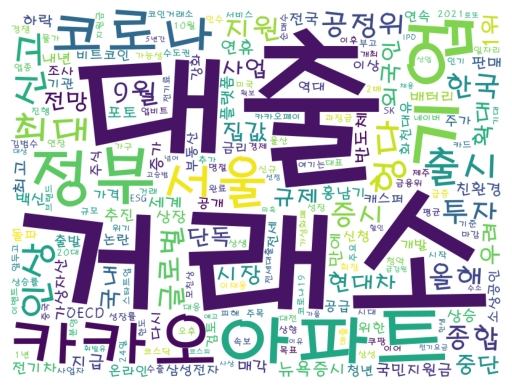

In [6]:
TextAnalysis(title_2, remove_list_2)